# Import Libraries and Load the Data

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Load dataset
train = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (8000, 30)
Test shape: (2845, 29)


#  Exploratory Data Analysis (EDA)

In [3]:
# Check column names and info
print("Columns in training data:", train.columns.tolist())
print("\nData info:")
train.info()

# Check basic descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
display(train.describe())

# Look for missing values in training data
print("\nMissing values in training data:")
display(train.isnull().sum())


Columns in training data: ['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   floa

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000



Missing values in training data:


Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

# Visualizing the Data

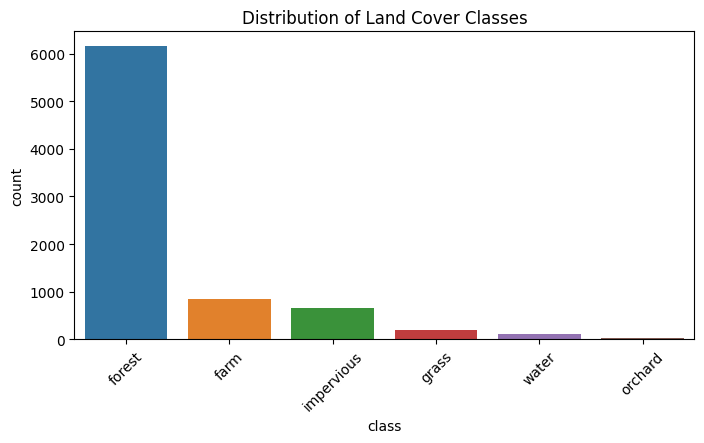

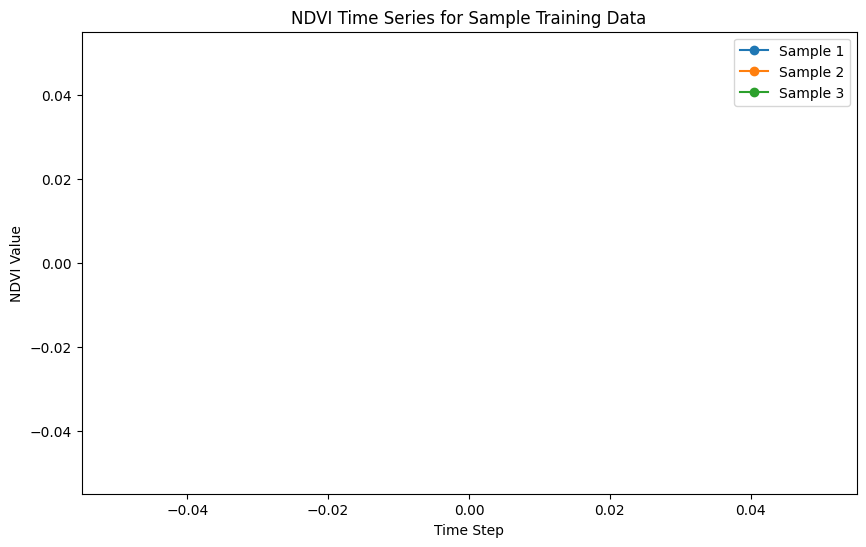

In [4]:
# Assuming there is a 'label' column for land cover type
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='class', order=train['class'].value_counts().index)
plt.title("Distribution of Land Cover Classes")
plt.xticks(rotation=45)
plt.show()

# If your NDVI time-series columns are named something like NDVI_1, NDVI_2, ... NDVI_27,
# plot the time-series for a few sample IDs

# List NDVI columns (adjust this list if your column names differ)
ndvi_cols = [col for col in train.columns if "NDVI" in col]

# Plot NDVI time series for the first 3 samples
plt.figure(figsize=(10,6))
for i in range(3):
    plt.plot(ndvi_cols, train.loc[i, ndvi_cols], marker='o', label=f"Sample {i+1}")
plt.xlabel("Time Step")
plt.ylabel("NDVI Value")
plt.title("NDVI Time Series for Sample Training Data")
plt.legend()
plt.show()


# Handle Missing Values

In [5]:
# Fill missing values with column medians
train_filled = train.fillna(train.median(numeric_only=True))
test_filled = test.fillna(test.median(numeric_only=True))


# Encode Labels

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels
le = LabelEncoder()
train_filled['label'] = le.fit_transform(train_filled['class'])

# Save original class names
class_names = le.classes_
print("Classes:", class_names)


Classes: ['farm' 'forest' 'grass' 'impervious' 'orchard' 'water']


# Prepare Features and Target

In [7]:
# Features and labels
X = train_filled.drop(columns=['Unnamed: 0', 'ID', 'class', 'label'])
y = train_filled['label']

# For test data
X_test = test_filled.drop(columns=['Unnamed: 0', 'ID'])


# Split into Train/Validation

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Train a RandomForest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=class_names))


Accuracy: 0.923125

Classification Report:
               precision    recall  f1-score   support

        farm       0.84      0.67      0.74       168
      forest       0.94      0.99      0.97      1232
       grass       1.00      0.33      0.50        39
  impervious       0.84      0.84      0.84       134
     orchard       0.00      0.00      0.00         6
       water       0.82      0.67      0.74        21

    accuracy                           0.92      1600
   macro avg       0.74      0.58      0.63      1600
weighted avg       0.92      0.92      0.91      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predict on Test Set

In [10]:
# Predict on test set
test_preds = model.predict(X_test)

# Decode to original class names
test_preds_labels = le.inverse_transform(test_preds)

# Create submission file
submission = test[['ID']].copy()
submission['class'] = test_preds_labels
submission.to_csv("submission.csv", index=False)

print("Submission saved as submission.csv")


Submission saved as submission.csv
